# Hebbian Learning Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

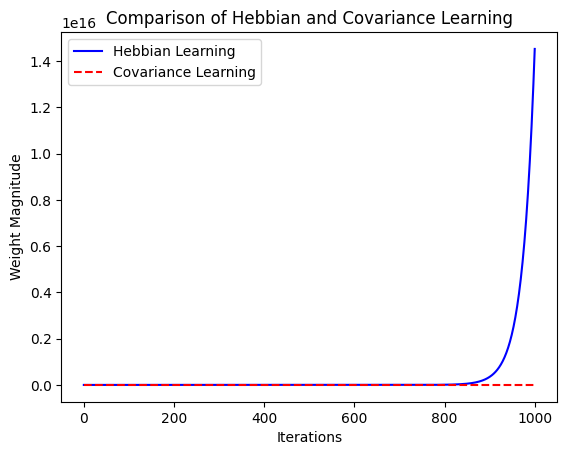

Learned weights (Hebbian): [1.17856565e+16 7.07139388e+15 4.71426258e+15]
Learned weights (Covariance): [0.29779256 0.94518308 0.68078983]


In [2]:
class Neuron:
    def __init__(self, num_inputs):
        self.weights = np.random.rand(num_inputs)

    def activate(self, inputs):
        return np.dot(inputs, self.weights)

    def hebbian(self, inputs, lr):
        activation = self.activate(inputs)
        self.weights += lr * activation * inputs

    def covariance(self, inputs, lr):
        activation = self.activate(inputs)
        self.weights += lr * (activation - np.mean(activation)) * inputs

if __name__ == "__main__":
    num = 3
    neuron = Neuron(num)
    inputs = np.array([0.5, 0.3, 0.2])
    lr = 0.1
    iterations = 1000
    
    hebbian_weights = np.copy(neuron.weights)
    covariance_weights = np.copy(neuron.weights)
    
    hebbian_history = [np.copy(hebbian_weights)]
    covariance_history = [np.copy(covariance_weights)]
    
    # Hebbian learning
    for i in range(iterations):
        neuron.hebbian(inputs, lr)
        hebbian_history.append(np.copy(neuron.weights))
    
    # Resetting the neuron
    neuron.weights = np.copy(covariance_weights)
    
    # Covariance-based learning
    for i in range(iterations):
        neuron.covariance(inputs, lr)
        covariance_history.append(np.copy(neuron.weights))
    
    hebbian_history = np.array(hebbian_history)
    covariance_history = np.array(covariance_history)
    
    # Plot the results
    plt.plot(np.linalg.norm(hebbian_history, axis=1), label='Hebbian Learning', linestyle='-', color='blue')
    plt.plot(np.linalg.norm(covariance_history, axis=1), label='Covariance Learning', linestyle='--', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Weight Magnitude')
    plt.title('Comparison of Hebbian and Covariance Learning')
    plt.legend()
    plt.show()
    
    print("Learned weights (Hebbian):", hebbian_history[-1])
    print("Learned weights (Covariance):", covariance_history[-1])